## Group Project Astr 19

<i> First of all, we want to address that while only one member of the group submitted the jupyter notebook, we all worked collaboratively in section every week. Because we all were working on the project at the same time, we ended up with separate jupyter notebooks, so we only submitted one persons. However, all members of the group were involved in completing the project equally. That being said, we had a google colab document that we all put ideas to share in, which we will also submit to the Github. <br> Signed: Walker, Bobby, Harrisun, Saul <br>

<i> To start, we'll import the necessary libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math

<i> Then we'll read in the data, and convert it so we only have one time scale that we can plot the heights against. We have to convert the time's in days, hours and minutes to just one unit, and we ended up using hours.   

In [3]:
data = np.loadtxt("/Users/walkermayer/downloads/ASTR19_F23_group_project_data.txt", dtype = str)
'''
Splitting the data up into the three values -days, time and height-. 
'''
days_str = data[:, [0]]
time = data[:, [1]]
height_str = data[:, [2]]

convtimelist = []

'''
Convert time as a string (HH:MM) to time as an integer (value in hours):
'''
for i in time: 
    y = str(i[0]).split(':')
    hours = int(y[0])
    mins = int(y[1])
    convtimelist.append(hours + mins / 60)
'''
Add the days (in hours) to our converted time:
'''   
for i in range(0, len(convtimelist)):   
    convtimelist[i] += math.ceil((i+1)/2) * 24
'''
Make all of our strings we read from the data file into something numpy can handle better:
'''
def convert_strings_to_floats(input_array):
    output_array = []
    for element in input_array:
        converted_float = float(element)
        output_array.append(converted_float)
    return output_array

days = convert_strings_to_floats(days_str)
heightlist = convert_strings_to_floats(height_str)


<i>  <br> Now we are going to make our plot with our converted time and height data:
    <br>  </i> 

In [4]:
plt.style.use("/Users/walkermayer/downloads/matplotlib_defaults.txt")

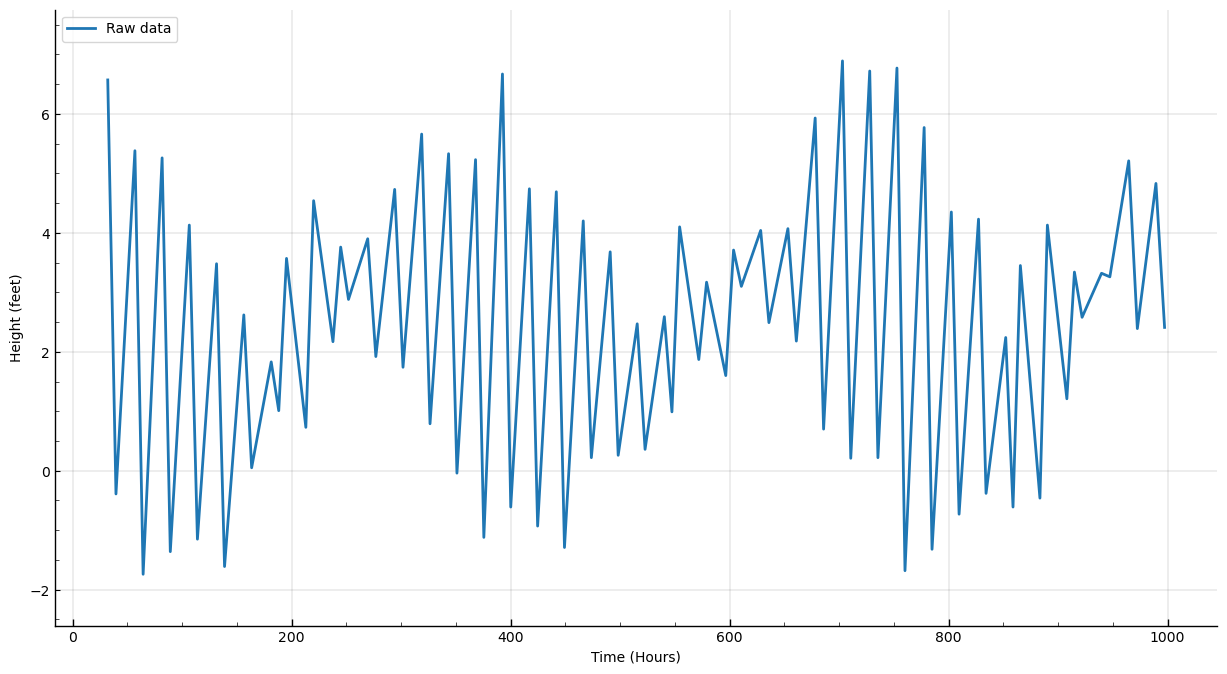

In [5]:
plt.plot(convtimelist, heightlist, label = 'Raw data')
plt.xlabel('Time (Hours)')
plt.ylabel('Height (feet)')
plt.legend(loc = 2)
plt.show()

### Now we'll start modeling the data:
<i> We need to try to fit a function to the curve, which we'll do using the optimize package from scipy. First we define our oscillatory function, which we decided should both oscillate and have an oscillating amplitude. <br>

In [6]:
# convert the data to arrays so the fit can be done better
convtime = np.array(convtimelist)
height = np.array(heightlist)

x = convtime
# define the function to fit
def f_osc(x, A, w1, delta1, const1, w2, delta2, const2):
    return (A * np.sin(x * w1 + delta1) + const1) * np.sin(x * w2 + delta2) + const2

# define an array for error
rms_error = np.full(82, 0.25)

# run the scipy curve fitting package
params, params_cov = optimize.curve_fit(f_osc, convtime, height, sigma = rms_error)

A_fit = params[0]
w1_fit = params[1]
delta1_fit = params[2]
const1_fit = params[3]
w2_fit = params[4]
delta2_fit = params[5]
const2_fit = params[6]

# final fit line
y_fit = (A_fit * np.sin(x * w1_fit + delta1_fit) + const1_fit) * np.sin(x * w2_fit + delta2_fit) + const2_fit

<i> <br> We'll make a plot of our data with our fit line to see how well they match up: <br>

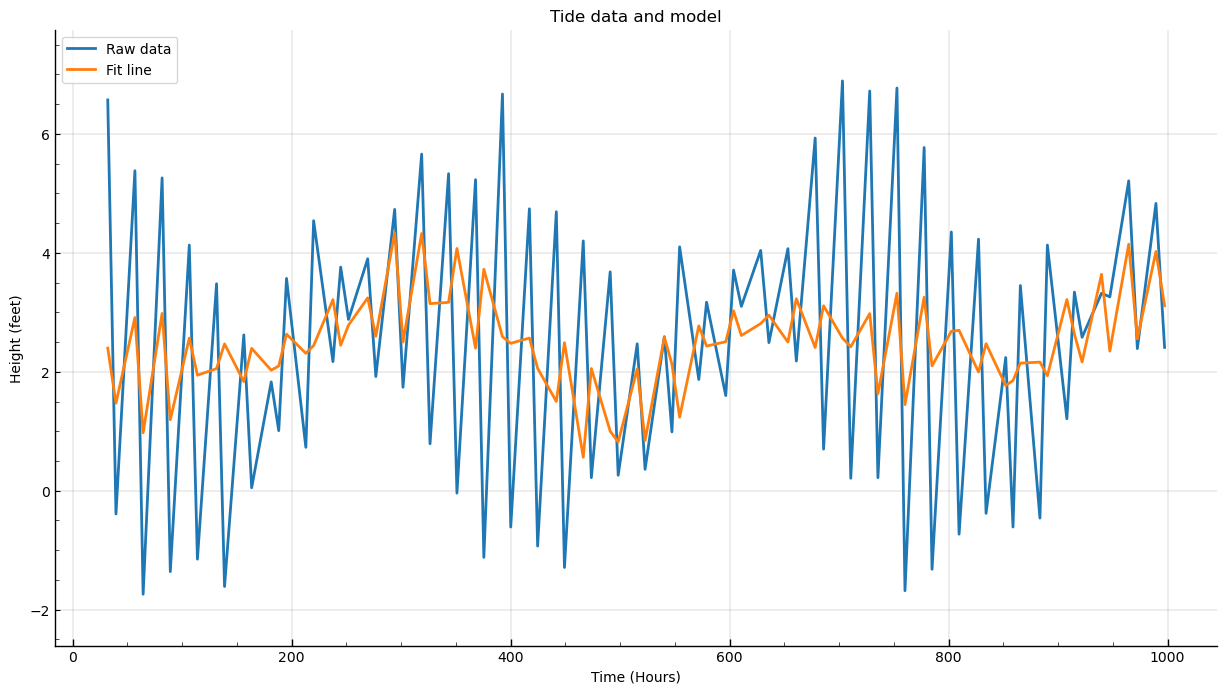

In [14]:
plt.plot(convtimelist, heightlist, label = 'Raw data')
plt.xlabel('Time (Hours)')
plt.ylabel('Height (feet)')
plt.title('Tide data and model')
plt.plot(x, y_fit, label = 'Fit line')
plt.legend(loc = 2)
plt.savefig("/Users/walkermayer/Desktop/Astr_19/modelwithdata.png")
plt.show()

### Now, we'll do some error analysis: 

<i> We'll look at the residuals of our fit, which is the difference of the original and the model. 

In [77]:
residuals = heightlist - y_fit

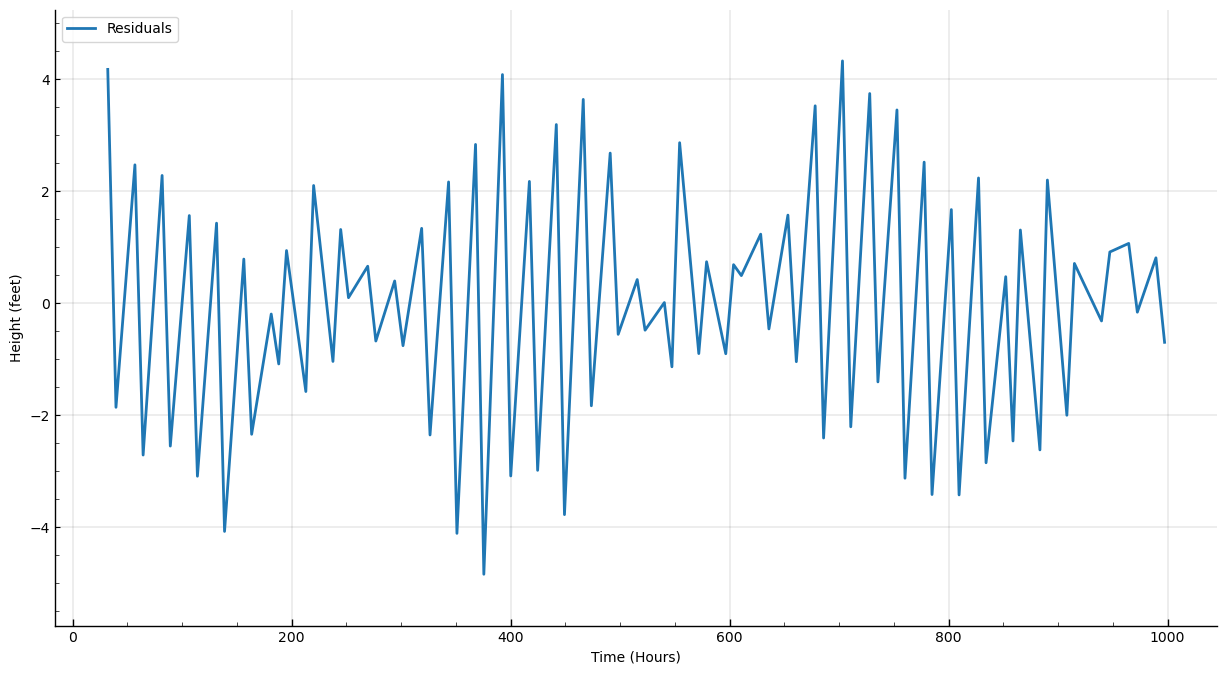

In [78]:
plt.plot(convtime, residuals, label = 'Residuals')
plt.xlabel('Time (Hours)')
plt.ylabel('Height (feet)')
plt.legend(loc = 2)
plt.show()

<i> To better analyze, we'll now we'll make a histogram of the residuals: <br>

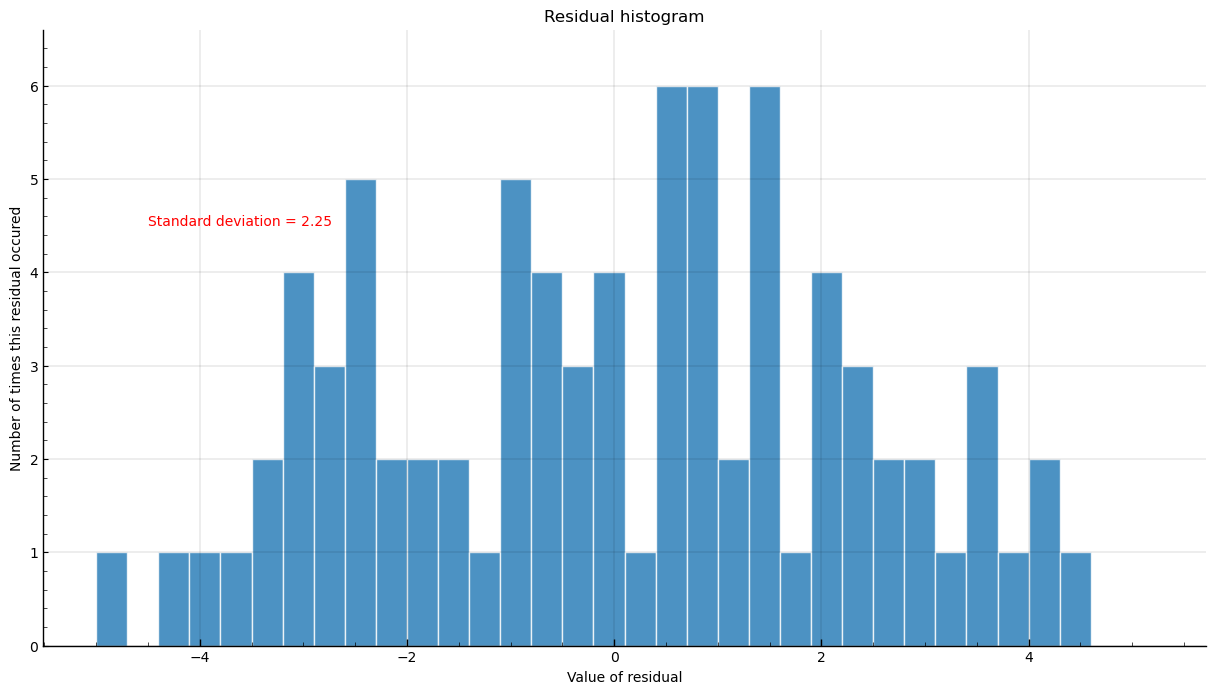

In [67]:
#create the histogram bins
width = .3
histmin = np.floor(min(residuals))   #np.floor rounds down to the closest integer
histmax = np.ceil(max(residuals)) + width  #np.ceil rounds up to the closest integer

bins = np.arange(histmin,histmax,width)
plt.hist(residuals, bins=bins, edgecolor = 'white', alpha = 0.8)
plt.xlabel('Value of residual')
plt.ylabel('Number of times this residual occured')
plt.text(-4.5, 4.5,'Standard deviation = 2.25', color = 'red')
plt.title('Residual histogram')
plt.savefig('/Users/walkermayer/Desktop/Astr_19/Residuals_histogram.png')
plt.show()

### Lastly, looking at the outlier:

<i> The outlier on January 14 increased water levels by 2ft, which is within one standard deviation (the standard deviation of the original data set is 2.38ft). <br> </i>
Replotting to show the new outlier:

In [79]:
residuals_outlier = np.append(residuals, 2)

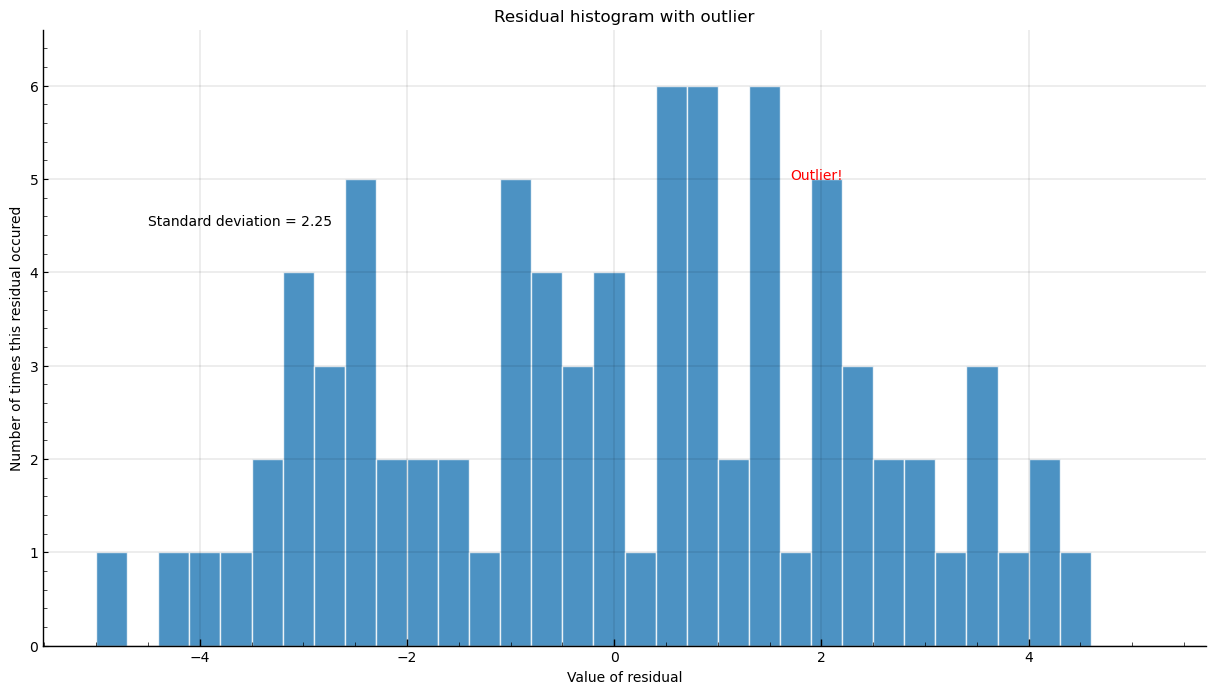

In [82]:
#create the histogram bins
width = .3
histmin = np.floor(min(residuals))   #np.floor rounds down to the closest integer
histmax = np.ceil(max(residuals)) + width  #np.ceil rounds up to the closest integer

bins = np.arange(histmin,histmax,width)
plt.hist(residuals_outlier, bins=bins, edgecolor = 'white', alpha = 0.8)
plt.xlabel('Value of residual')
plt.ylabel('Number of times this residual occured')
plt.title('Residual histogram with outlier')
plt.text(1.7, 5, 'Outlier!', color = 'red')
plt.text(-4.5, 4.5,'Standard deviation = 2.25')
plt.savefig('/Users/walkermayer/Desktop/Astr_19/Residuals_histogram_outlier.png')
plt.show()